In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Note to self, I wonder if the don is part of don't rather than Don in the case of "Don Trump"
# Also note: Professor Hutchings likes where this is going, but it's a good a idea to get more precise through other methods of
# data visualization/ clustering/ sentiment analysis

# Notes from Monsieur Kapoor:
# Semantic similarities
# cohere or chatgpt models
# deviations of from the center of each cluster
# dbscan strength of similaries
# instead of predefined fixed clusters, we choose the number of clusters based on how many members are in the cluster

# network diagrams
# rights  connect with womens or voting rights? positive or negative
# indexing software
# 2016 election, 2020 election, 2024 election mini time series


# split by PID and make a word cloud for each for these concepts
# topic models, reducing dimensionality
# estimating latent dimensions of LLMs
# latent topics over time? trends over time


## LOADING IN THE DATA FROM THE SPREADSHEET

In [2]:
file_path = '/Users/yipho/anes/anes_pre_response/anes_prepost_open.xlsx'

# V241110 - PRE: What is it that R likes about Democratic Presidential candidate [text]
df_likes_dcan = pd.read_excel(file_path, sheet_name='V241110')
df_likes_dcan['cleaned_response'] = df_likes_dcan['V241110 - PRE: What is it that R likes about Democratic Presidential candidate [text]'].fillna('').astype(str)

# V241112 - PRE: What is it that R dislikes about Democratic Presidential candidate [text]
df_dislikes_dcan = pd.read_excel(file_path, sheet_name='V241112')
df_dislikes_dcan['cleaned_response'] = df_dislikes_dcan['V241112 - PRE: What is it that R dislikes about Democratic Presidential candidate [text]'].fillna('').astype(str)

# V241114 - PRE: What is it that R likes about Republican Presidential candidate [text]
df_likes_rcan = pd.read_excel(file_path, sheet_name='V241114')
df_likes_rcan['cleaned_response'] = df_likes_rcan['V241114 - PRE: What is it that R likes about Republican Presidential candidate [text]'].fillna('').astype(str)

# V241116 - PRE: What is it that R dislikes about Republican Presidential candidate [text]
df_dislikes_rcan = pd.read_excel(file_path, sheet_name='V241116')
df_dislikes_rcan['cleaned_response'] = df_dislikes_rcan['V241116 - PRE: What is it that R dislikes about Republican Presidential candidate [text]'].fillna('').astype(str)

# V241170 - PRE: What does R like about Democratic party [text]
df_likes_dparty = pd.read_excel(file_path, sheet_name='V241170')
df_likes_dparty['cleaned_response'] = df_likes_dparty['V241170 - PRE: What does R like about Democratic party [text]'].fillna('').astype(str)

# V241172 - PRE: What does R dislike about the Democratic party [text]
df_dislikes_dparty = pd.read_excel(file_path, sheet_name='V241172')
df_dislikes_dparty['cleaned_response'] = df_dislikes_dparty['V241172 - PRE: What does R dislike about the Democratic party [text]'].fillna('').astype(str)

# V241174 - PRE: What does R like about Republican party [text]
df_likes_rparty = pd.read_excel(file_path, sheet_name='V241174')
df_likes_rparty['cleaned_response'] = df_likes_rparty['V241174 - PRE: What does R like about Republican party [text]'].fillna('').astype(str)

# V241176 - PRE: What does R dislike about the Republican party [text]
df_dislikes_rparty = pd.read_excel(file_path, sheet_name='V241176')
df_dislikes_rparty['cleaned_response'] = df_dislikes_rparty['V241176 - PRE: What does R dislike about the Republican party [text]'].fillna('').astype(str)

### COMPARISONS BETWEEN DISLIKES AND LIKES OF THE DEMOCRATIC CANDIDATE

In [3]:
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,3))
new_stop_words = ['/ae', '/ao', 'ae', '/char', 'char', 'just', 'ao', 'like', 'just', '10', 'redacted']

# TODO change this to tfidf
# Combine the new stop words with the existing ones
combined_stop_words = vectorizer.get_stop_words().union(new_stop_words)
vectorizer.set_params(stop_words=list(combined_stop_words))
print(vectorizer.get_stop_words())


X_dislikes_dcan = vectorizer.fit_transform(df_dislikes_dcan['cleaned_response'])
bow_df_dl_dcan = pd.DataFrame(X_dislikes_dcan.toarray(), columns=vectorizer.get_feature_names_out())


X_likes_dcan = vectorizer.fit_transform(df_likes_dcan['cleaned_response'])
bow_df_l_dcan = pd.DataFrame(X_likes_dcan.toarray(), columns=vectorizer.get_feature_names_out())

dislikes_sum = bow_df_dl_dcan.sum().sort_values(ascending=False)
likes_sum = bow_df_l_dcan.sum().sort_values(ascending=False)
print(dislikes_sum)
print(likes_sum)


frozenset({'everywhere', 'like', 'might', 'top', 'yours', 'eleven', 'up', 'thick', 'after', 'namely', 'can', 'throughout', 'those', 'was', 'seem', 'empty', 'bottom', 'upon', 'bill', 'then', 'whereafter', 'wherever', 'still', 'sometimes', 'several', 'though', 'inc', 'which', 'wherein', 'for', 'see', 'that', 'char', 'do', 'nine', 'on', 'couldnt', 'except', 'thence', 'fill', 'may', 'cry', 'they', 'while', 'nobody', 'she', 'once', 'herself', 'nowhere', 'formerly', 'almost', 'along', 'often', 'via', 'detail', 'yourselves', 'due', 'when', 'ltd', 'us', 'amount', 'whereas', 'an', 'them', 'other', 'already', 'cannot', 'too', 'found', 'behind', 'themselves', 'during', 'anywhere', 'five', 'from', 'twelve', 'forty', 'always', 'he', 'perhaps', 'hereupon', 'side', 'others', 'mine', 'could', 'hundred', '/ae', 'meanwhile', 'his', 'ours', 'whereupon', 'their', 'its', '/ao', 'seeming', 'last', 'to', 'otherwise', 'all', 'only', 'at', 'whom', 'whence', 'some', 'without', 'have', 'done', 'ourselves', 'fron

policies          25.279036
don               22.724976
border            18.655371
liberal           18.399571
abortion          15.482840
president         14.557416
think             14.505504
experience        12.534810
country           12.236148
policy            11.813542
people            10.873081
years             10.828959
views             10.656098
biden             10.603099
dont              10.351182
lack               9.711807
know               9.438006
doesn              9.003031
economy            8.914222
stance             8.700203
vice               8.568666
shes               8.450477
immigration        7.497033
things             7.495101
vice president     7.412102
feel               7.050438
democrat           6.845327
agree              6.551245
israel             6.399220
does               6.345430
don think          6.109291
vp                 6.082826
trump              5.944153
candidate          5.943044
really             5.866544
democratic         5

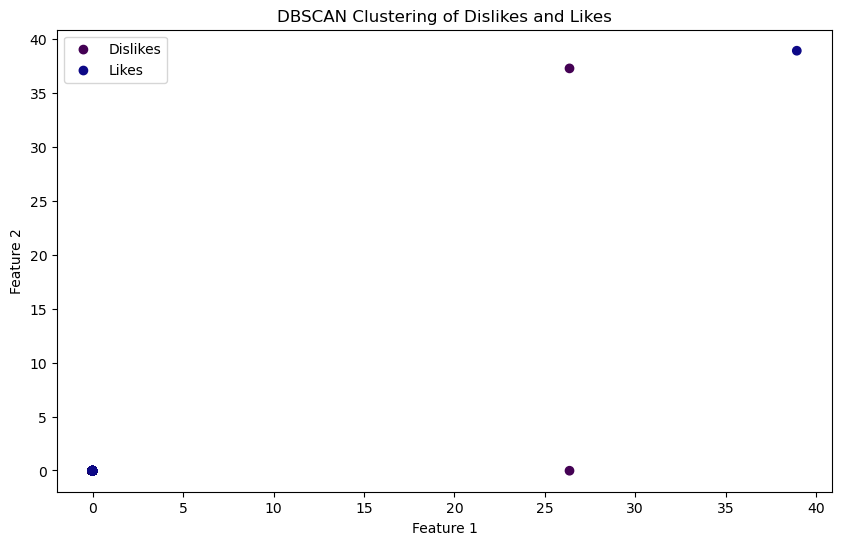

In [4]:
#TF IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=list(combined_stop_words), ngram_range=(1,3))
X_dislikes_dcan_tfidf = tfidf_vectorizer.fit_transform(df_dislikes_dcan['cleaned_response'])
X_likes_dcan_tfidf = tfidf_vectorizer.fit_transform(df_likes_dcan['cleaned_response'])
tfidf_df_dl_dcan = pd.DataFrame(X_dislikes_dcan_tfidf.toarray(), columns=tfidf_vectorizer.fit(df_dislikes_dcan['cleaned_response']).get_feature_names_out())
tfidf_df_l_dcan = pd.DataFrame(X_likes_dcan_tfidf.toarray(), columns=tfidf_vectorizer.fit(df_likes_dcan['cleaned_response']).get_feature_names_out())
tfidf_dislikes_sum = tfidf_df_dl_dcan.sum().sort_values(ascending=False)
tfidf_likes_sum = tfidf_df_l_dcan.sum().sort_values(ascending=False)
print(tfidf_dislikes_sum.head(50))

print(tfidf_likes_sum)

# dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
# Standardize the data
X_dislikes_dcan_std = StandardScaler().fit_transform(X_dislikes_dcan.toarray())
X_likes_dcan_std = StandardScaler().fit_transform(X_likes_dcan.toarray())
# Perform DBSCAN clustering
dbscan_dislikes = DBSCAN(eps=0.5, min_samples=5).fit(X_dislikes_dcan_std)
dbscan_likes = DBSCAN(eps=0.5, min_samples=5).fit(X_likes_dcan_std)
# Get the cluster labels
dislikes_labels = dbscan_dislikes.labels_
likes_labels = dbscan_likes.labels_
# Count the number of clusters
n_clusters_dislikes = len(set(dislikes_labels)) - (1 if -1 in dislikes_labels else 0)
n_clusters_likes = len(set(likes_labels)) - (1 if -1 in likes_labels else 0)
print(f"Number of clusters for dislikes: {n_clusters_dislikes}")
print(f"Number of clusters for likes: {n_clusters_likes}")
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_dislikes_dcan_std[:, 0], X_dislikes_dcan_std[:, 1], c=dislikes_labels, cmap='viridis', label='Dislikes')
plt.scatter(X_likes_dcan_std[:, 0], X_likes_dcan_std[:, 1], c=likes_labels, cmap='plasma', label='Likes')
plt.title('DBSCAN Clustering of Dislikes and Likes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### WORD CLOUD IMPLEMENTATION

              Likes  Dislikes
trump         319.0      63.0
rights        224.0      25.0
people        221.0     139.0
think         206.0     191.0
woman         186.0      33.0
donald        149.0      18.0
good          147.0      56.0
women         144.0      20.0
donald trump  144.0      16.0
policies      142.0     189.0
president     127.0     166.0
country       125.0     136.0
class          94.0      22.0
experience     88.0      57.0
abortion       87.0      90.0
better         79.0      17.0
middle         73.0      27.0
person         72.0      29.0
female         67.0       8.0
women rights   66.0       2.0


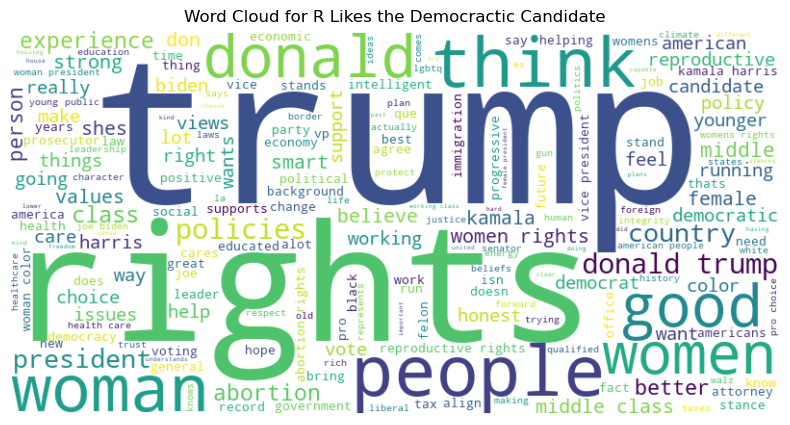

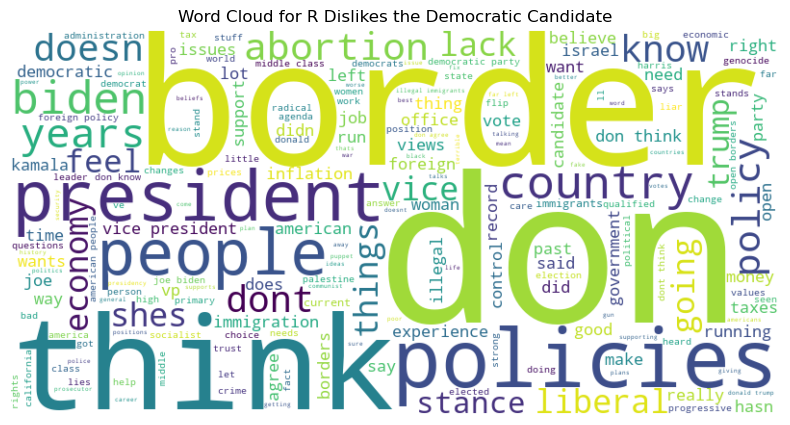

In [5]:
from wordcloud import WordCloud

comparison_df = pd.concat([likes_sum, dislikes_sum], axis=1)
comparison_df.columns = ['Likes', 'Dislikes']

print(comparison_df.sort_values(by='Likes', ascending=False).head(20))
# Generate word cloud for likes
wordcloud_likes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(likes_sum)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_likes, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for R Likes the Democractic Candidate')
plt.show()

# Generate word cloud for dislikes
wordcloud_dislikes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dislikes_sum)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_dislikes, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for R Dislikes the Democratic Candidate')
plt.show()


### DISLIKES AND LIKES OF THE DEMOCRATIC PARTY

In [6]:
X_likes_dparty = vectorizer.fit_transform(df_likes_dparty['cleaned_response'])
bow_df_l_dparty = pd.DataFrame(X_likes_dparty.toarray(), columns=vectorizer.get_feature_names_out())

X_dislikes_dparty = vectorizer.fit_transform(df_dislikes_dparty['cleaned_response'])
bow_df_dl_dparty = pd.DataFrame(X_dislikes_dparty.toarray(), columns=vectorizer.get_feature_names_out())

dislikes_sum = bow_df_dl_dparty.sum().sort_values(ascending=False)
likes_sum = bow_df_l_dparty.sum().sort_values(ascending=False)

print(dislikes_sum)
print(likes_sum)


don                          348
people                       298
party                        279
think                        241
policies                     191
                            ... 
freedom feels                  1
freedom democracy ones         1
freedom democracy              1
freedom criminal jusctice      1
zionist antisemitic            1
Length: 33998, dtype: int64
people                               447
rights                               350
party                                259
abortion                             167
think                                165
                                    ... 
generally progressive view             1
generally progressive little           1
generally progressive alternative      1
generally pro family                   1
ytry govern instead                    1
Length: 23909, dtype: int64


                  Likes  Dislikes
people            447.0     298.0
rights            350.0      49.0
party             259.0     279.0
abortion          167.0     144.0
think             165.0     241.0
policies          162.0     191.0
class             153.0      45.0
support           151.0      80.0
care              145.0      63.0
women             144.0      13.0
democratic        142.0     121.0
social            140.0      41.0
middle            135.0      48.0
democratic party  119.0      99.0
middle class      105.0      29.0
help              104.0      46.0
good               99.0      54.0
trying             99.0      50.0
right              97.0      70.0
country            92.0     154.0


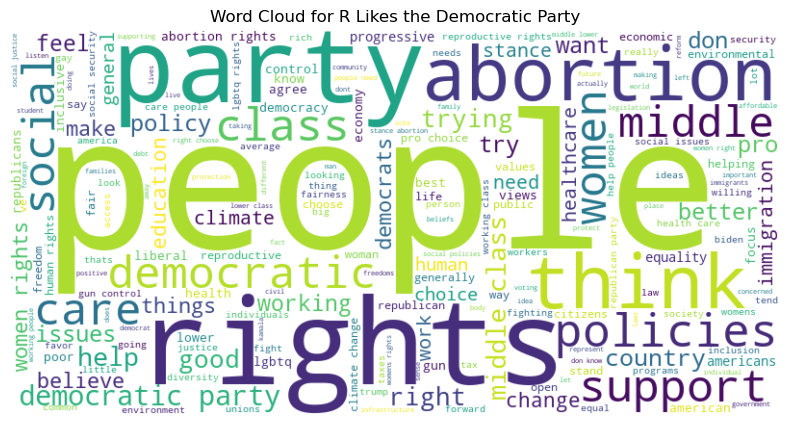

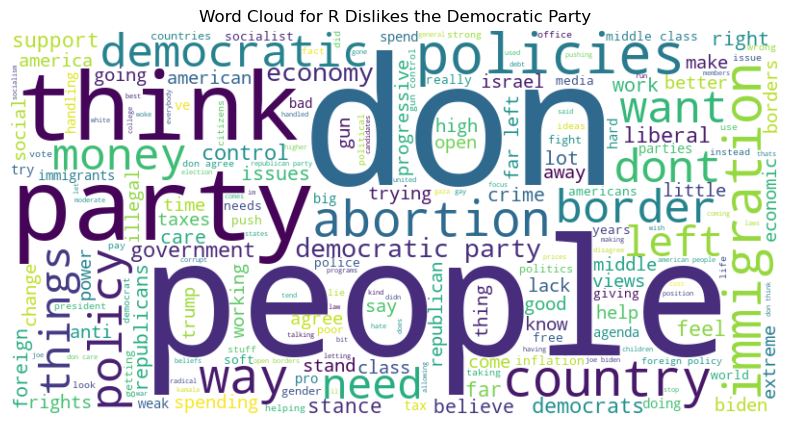

In [7]:
comparison_df = pd.concat([likes_sum, dislikes_sum], axis=1)
comparison_df.columns = ['Likes', 'Dislikes']
print(comparison_df.sort_values(by='Likes', ascending=False).head(20))

wordcloud_likes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(likes_sum)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_likes, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for R Likes the Democratic Party')
plt.show()


wordcloud_dislikes = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dislikes_sum)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_dislikes, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for R Dislikes the Democratic Party')
plt.show()

In [8]:
X_likes_rcan = vectorizer.fit_transform(df_likes_rcan['cleaned_response'])
bow_df_l_rcan = pd.DataFrame(X_likes_rcan.toarray(), columns=vectorizer.get_feature_names_out())

X_dislikes_rcan = vectorizer.fit_transform(df_dislikes_rcan['cleaned_response'])
bow_df_rl_rcan = pd.DataFrame(X_dislikes_rcan.toarray(), columns=vectorizer.get_feature_names_out())


dislikes_rsum = bow_df_rl_rcan.sum(axis=0)
likes_rsum = bow_df_l_rcan.sum(axis=0)
comparison_rdf = pd.concat([likes_rsum, dislikes_rsum], axis=1)
comparison_rdf.columns = ['likes', 'dislikes']
print(comparison_rdf.sort_values(by='likes', ascending=False).head(20))

           likes  dislikes
economy    258.0      14.0
country    223.0     207.0
border     186.0      19.0
better     172.0      32.0
people     166.0     328.0
president  161.0     132.0
policies   159.0     119.0
think      157.0     277.0
good       152.0      89.0
america    137.0      41.0
business   136.0      38.0
things     109.0     122.0
strong     101.0      16.0
policy      97.0      52.0
trump       89.0     140.0
did         88.0      42.0
man         79.0      74.0
going       78.0      40.0
don         77.0     226.0
wants       71.0      98.0


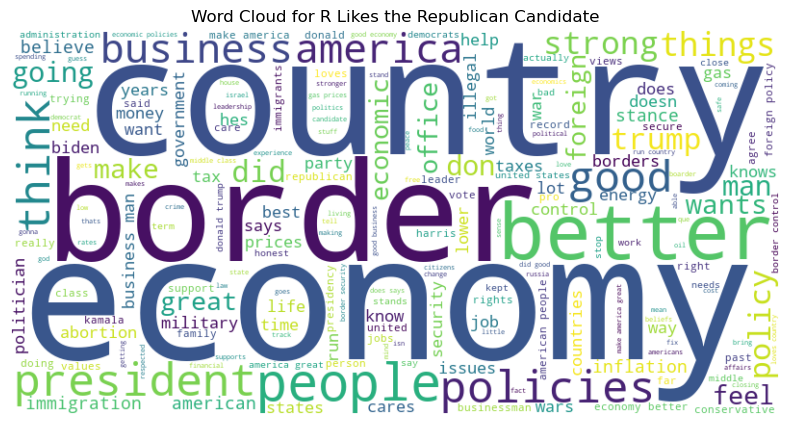

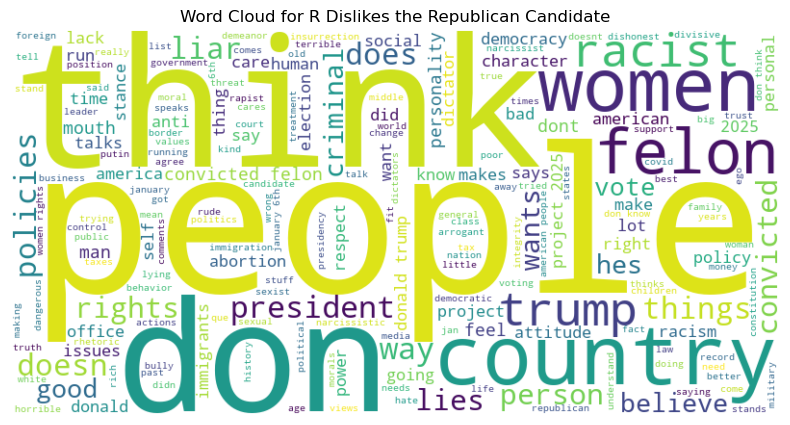

In [9]:
wordcloud_likesr = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(likes_rsum)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_likesr, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for R Likes the Republican Candidate')
plt.show()

wordcloud_dislikesr = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dislikes_rsum)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_dislikesr, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for R Dislikes the Republican Candidate')
plt.show()


In [10]:
X_likes_rparty = vectorizer.fit_transform(df_likes_rparty['cleaned_response'])
bow_df_l_rparty = pd.DataFrame(X_likes_rparty.toarray(), columns=vectorizer.get_feature_names_out())

X_dislikes_rparty = vectorizer.fit_transform(df_dislikes_rparty['cleaned_response'])
bow_df_rl_rparty = pd.DataFrame(X_dislikes_rparty.toarray(), columns=vectorizer.get_feature_names_out())


dislikes_rpartysum = bow_df_rl_rparty.sum(axis=0)
likes_rpartysum = bow_df_l_rparty.sum(axis=0)
comparison_rpartydf = pd.concat([likes_rpartysum, dislikes_rpartysum], axis=1)
comparison_rpartydf.columns = ['likes', 'dislikes']
print(comparison_rpartydf.sort_values(by='likes', ascending=False).head(20))

                  likes  dislikes
party             274.0     390.0
people            215.0     274.0
republican        171.0     165.0
conservative      170.0      58.0
economy           164.0      14.0
policies          142.0     130.0
think             142.0     187.0
better            136.0      30.0
country           130.0     105.0
immigration       129.0      68.0
values            128.0      40.0
republican party  126.0     118.0
government        118.0      45.0
policy            110.0      88.0
border             95.0      16.0
abortion           94.0     231.0
rights             91.0     179.0
want               90.0      88.0
support            88.0      96.0
good               87.0      54.0


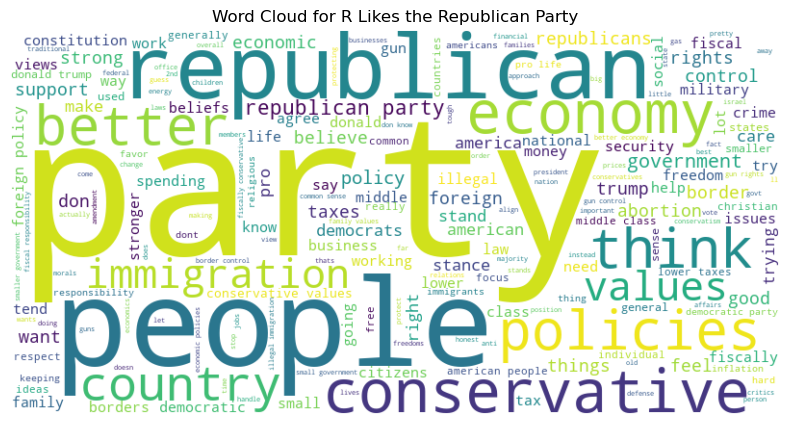

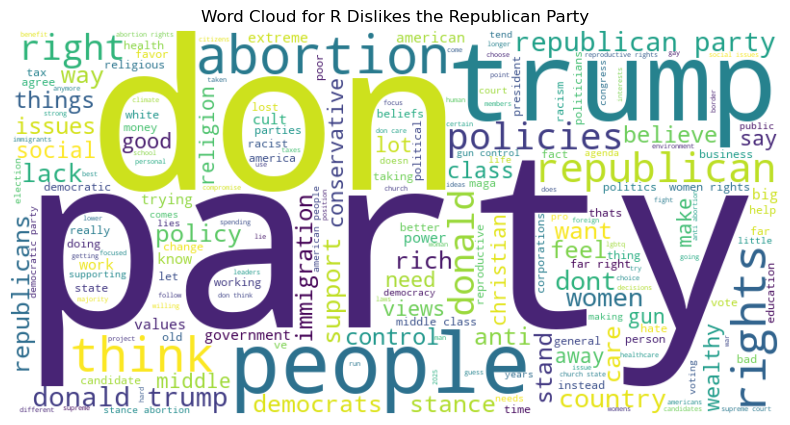

In [11]:
wordcloud_likesrparty = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(likes_rpartysum)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_likesrparty, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for R Likes the Republican Party')
plt.show()

wordcloud_dislikesrparty = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dislikes_rpartysum)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_dislikesrparty, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for R Dislikes the Republican Party')
plt.show()

In [12]:
# dbscan clustering try out
from sklearn.cluster import DBSCAN
import numpy as np

# combine dataframes for republican candidates likes and dislikes for clustering